# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 calls put together by [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* **lat** : Latitude FLOAT
* **lng**: Longitude FLOAT
* **desc**: Description of the Emergency Call STRING
* **zip**: Zipcode FLOAT
* **title**: Title STRING
* **timeStamp**: STRING, YYYY-MM-DD HH:MM:SS
* **twp**: Township STRING
* **addr**: Address STRING
* **e**: Dummy variable (always 1) INTEGER

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
**Import numpy and pandas**

In [1]:
import numpy as np
import pandas as pd

**Import visualization libraries and set `%matplotlib inline`.**

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

**Read in the csv file as a dataframe called df**

In [3]:
df = pd.read_csv('911.csv')

In [33]:
df.shape

(99492, 13)

**Check the `info()` of the df**

In [4]:
# Columns 'zip', 'twp', 'addr' have some null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Check the head of df**

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [6]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [7]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [8]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Take a look at the 'title' column, how many unique title codes are there?**

In [9]:
# Can also use nunique()
len(df['title'].unique())

110

## Creating new features

**In the title column there are 'departments' specified before the call type. These are 'EMS', 'Fire', and 'Traffic'. Use `.apply()` with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [10]:
df['title'].unique()[:5]

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS'],
      dtype=object)

In [11]:
'EMS: BACK PAINS/INJURY'.split(':')[0]

'EMS'

In [12]:
df['REASONS'] = df['title'].apply(lambda x: x.split(':')[0])

In [13]:
df.sample(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons
26827,40.215829,-75.240835,W WELSH RD & ROSE LN; LOWER GWYNEDD; 2016-02-1...,19454.0,Traffic: VEHICLE ACCIDENT -,2016-02-15 17:52:00,LOWER GWYNEDD,W WELSH RD & ROSE LN,1,Traffic
78607,40.107761,-75.318549,E RIDGE PIKE & DIAMOND AVE; PLYMOUTH; 2016-07-...,19462.0,Traffic: DISABLED VEHICLE -,2016-07-01 18:27:01,PLYMOUTH,E RIDGE PIKE & DIAMOND AVE,1,Traffic
39967,40.117619,-75.313045,SANDY HILL RD & GRANDVIEW RD; PLYMOUTH; Stati...,19462.0,EMS: VEHICLE ACCIDENT,2016-03-21 08:02:00,PLYMOUTH,SANDY HILL RD & GRANDVIEW RD,1,EMS
67575,40.182100,-75.217745,NORRISTOWN RD & RADCLIFF LN; LOWER GWYNEDD; S...,19002.0,EMS: FALL VICTIM,2016-06-03 14:42:02,LOWER GWYNEDD,NORRISTOWN RD & RADCLIFF LN,1,EMS
14201,40.123177,-75.333716,DEKALB ST & E FORNANCE ST; NORRISTOWN; Statio...,19401.0,EMS: RESPIRATORY EMERGENCY,2016-01-16 17:07:00,NORRISTOWN,DEKALB ST & E FORNANCE ST,1,EMS
88406,40.314104,-75.601436,SPRUCE ST & NATHAN AVE; DOUGLASS; Station 332...,19525.0,EMS: CARDIAC EMERGENCY,2016-07-27 03:07:01,DOUGLASS,SPRUCE ST & NATHAN AVE,1,EMS
22988,40.114957,-75.345633,MAIN ST & CHERRY ST; NORRISTOWN; 2016-02-05 @ ...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-02-05 13:11:01,NORRISTOWN,MAIN ST & CHERRY ST,1,Traffic
13500,40.252831,-75.655076,MANATAWNY ST & STATE ST; POTTSTOWN; 2016-01-14...,19464.0,Fire: RESCUE - GENERAL,2016-01-14 21:51:00,POTTSTOWN,MANATAWNY ST & STATE ST,1,Fire
9400,40.169275,-75.092456,BYBERRY RD & VILLAGE CIR; UPPER MORELAND; 2016...,19040.0,Fire: FIRE ALARM,2016-01-05 08:32:00,UPPER MORELAND,BYBERRY RD & VILLAGE CIR,1,Fire
40391,40.174538,-75.459364,IRON BARK CT & PERKIOMEN BLVD; UPPER PROVIDEN...,19426.0,EMS: ALLERGIC REACTION,2016-03-22 12:32:00,UPPER PROVIDENCE,IRON BARK CT & PERKIOMEN BLVD,1,EMS


**What are the most common reasons for a 911 call based off this new column?**

In [14]:
df['REASONS'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reasons, dtype: int64

**Now use Seaborn to create a count plot of 911 calls by reason.**

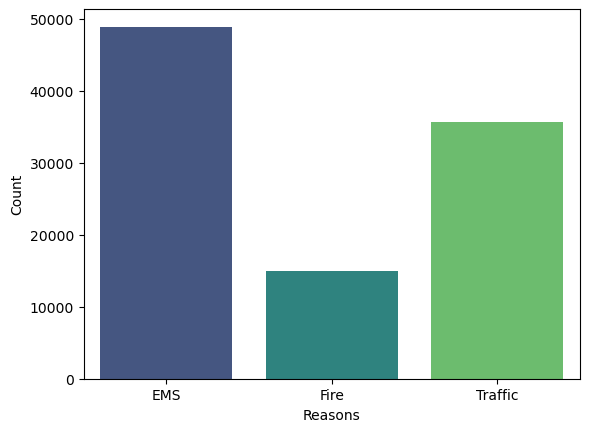

In [15]:
sns.countplot(x='REASONS', data=df, palette='viridis')
#plt.xlabel('Reasons')
plt.ylabel('COUNT');

In [ ]:
# EMS is the greatest reason for a 911 call (~1000 more calls than traffic incidents)

___
**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [16]:
type(df['timeStamp'].loc[0])

str

**You should see that timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [17]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'], format='%Y-%m-%d %H:%M:%S')

In [18]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

**You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's Tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use `.apply()` to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off the timeStamp column, and reference the solutions if you get stuck on this step.**

In [19]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [20]:
time

Timestamp('2015-12-10 17:40:00')

In [21]:
df['HOUR'] = df['timeStamp'].apply(lambda date: date.hour)
df['MONTH'] = df['timeStamp'].apply(lambda date: date.month)
df['DAY'] = df['timeStamp'].apply(lambda date: date.dayofweek)

In [22]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons,hour,month,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


**Notice how the Day of Week is an integer 0-6. Use `.map()` with dictionary below to map the actual string names to the day of the week:**

    dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [23]:
df['DAY'] = df.day.map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'})

In [24]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons,hour,month,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


**Now use Seaborn to create a count plot of the Day of Week column with the hue based off the reasons column.**

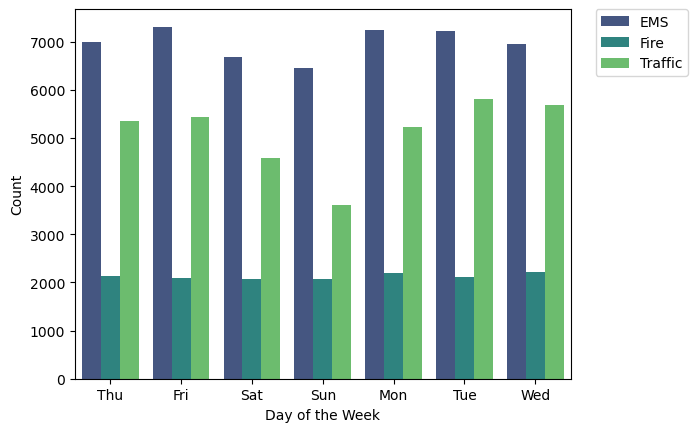

In [25]:
sns.countplot(x='DAY', hue='REASONS', data=df, palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [ ]:
# The number of reasons mostly stay at relatively the same level regardless of the day of the week, except for
# Sunday has significantly less traffic incidents

**Now do the same for Month:**

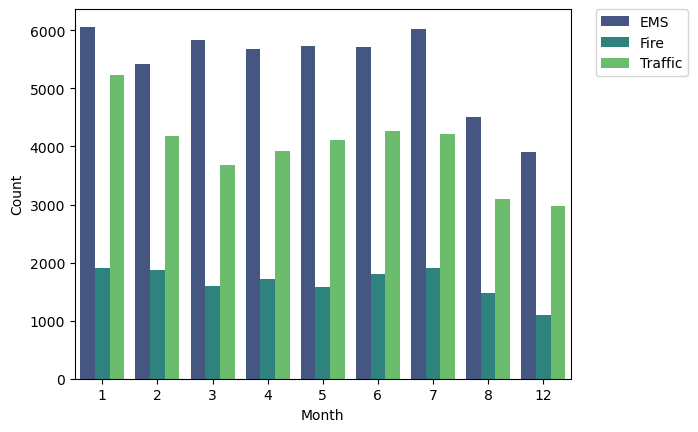

In [26]:
sns.countplot(x='MONTH', hue='REASONS', data=df, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [ ]:
# The number of 911 calls after July decrease greatly, but we are missing 3 months of data

**Did you notice something strange about the Plot?**

_____

**You should have noticed we are missing some months (Sept, Oct and Nov), let's see if we can fill in this information by plotting the information in another way, possibly a simple line plot that 'imputes' the missing month values. In order to do this, we need to do some work with Pandas...**

**Create a `groupby` object called byMonth, where you group the DataFrame by the month column and use `count()` method for aggregation. Use `head()` method on this returned DataFrame.**

In [27]:
# Remember that month becomes the index in groupby object
byMonth = df.groupby('MONTH').count()

In [28]:
# See that all column values are similar - they are summed up per month
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons,hour,day
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**Create a simple plot of the DataFrame indicating the count of calls per month.**

In [29]:
plt.style.use(style='ggplot')

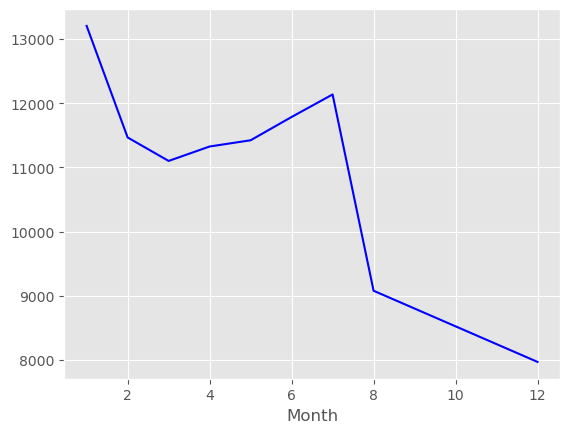

In [30]:
# Can be any column without any null values, e.g. 'e'
byMonth['e'].plot(color='blue')
plt.xlabel('MONTH');

**See if you can use Seaborn's `lmplot()` to create a *linear fit* on the number of calls per month. Keep in mind that you may need to reset the index to a column.**

In [31]:
# Remember that groupby function makes the group by column the new index
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons,hour,day
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


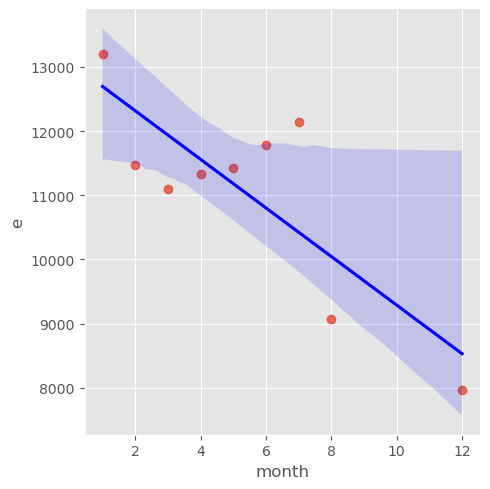

In [32]:
# Resetting index generates a new index and makes the month column normal
sns.lmplot(x='MONTH', y='e', data=byMonth.reset_index(), line_kws={'color': 'blue'});

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use `apply()` along with the `.date()` method.** 

In [36]:
time

Timestamp('2015-12-10 17:40:00')

In [39]:
time.date()

datetime.date(2015, 12, 10)

In [40]:
df['DATE'] = df['timeStamp'].apply(lambda time: time.date())

In [41]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons,hour,month,day,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


**Now 'group by' this Date column with the `count()` aggregate and create a plot of counts of 911 calls.**

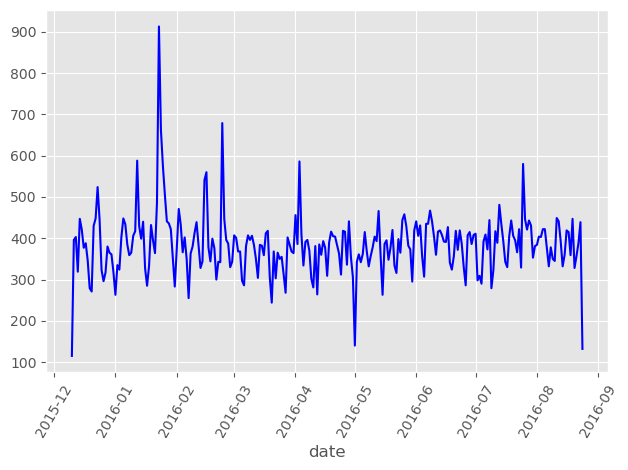

In [48]:
df.groupby('DATE')['e'].count().plot(color='blue')
plt.xticks(rotation=60);

**Recreate this plot, but create 3 separate plots with each plot representing a reason for the 911 call**

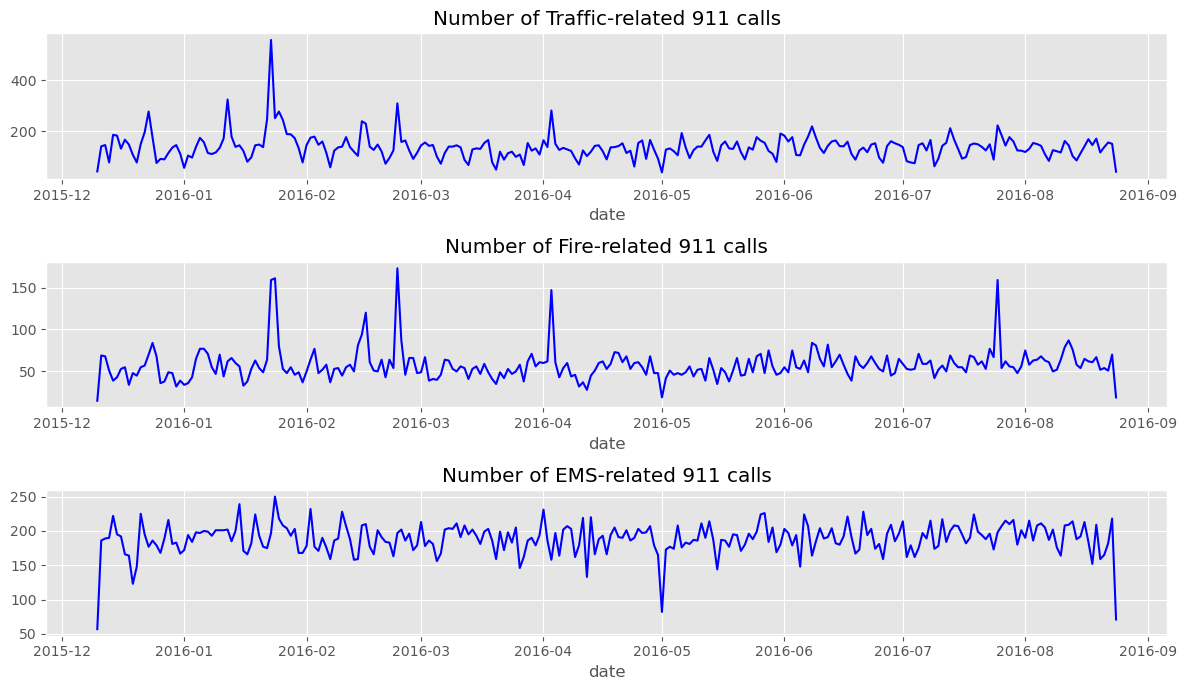

In [67]:
fg, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 7))

df[df['REASONS'] == 'Traffic'].groupby('DATE')['e'].count().plot(color='blue', ax=axes[0])
axes[0].set_title('Number of Traffic-related 911 calls')

df[df['REASONS'] == 'Fire'].groupby('DATE')['e'].count().plot(color='blue', ax=axes[1])
axes[1].set_title('Number of Fire-related 911 calls')

df[df['REASONS'] == 'EMS'].groupby('DATE')['e'].count().plot(color='blue', ax=axes[2])
axes[2].set_title('Number of EMS-related 911 calls')

plt.tight_layout();

____
**Now let's move on to creating heatmaps with Seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [112]:
df_unstacked = df.groupby(by=['day', 'hour'])['e'].count().unstack()

In [113]:
df_unstacked.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


**Create a HeatMap using this new DataFrame.**

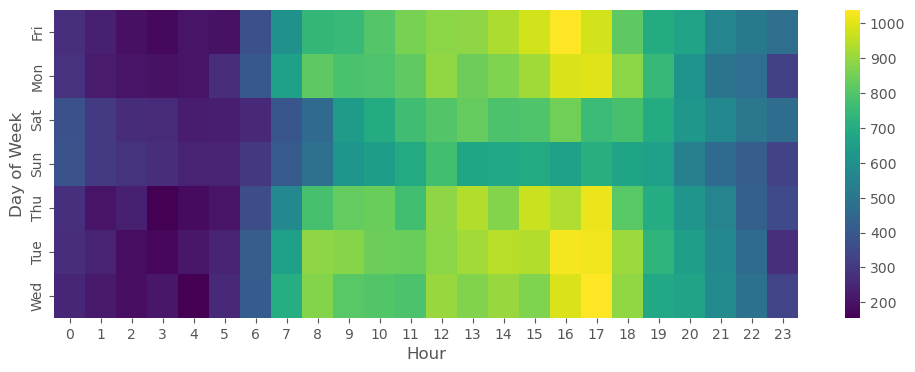

In [118]:
plt.figure(figsize=(12, 4))

sns.heatmap(df_unstacked, cbar=True, cmap='viridis')
plt.xlabel('Hour')
plt.ylabel('Day of Week');

In [ ]:
# Not many 911 calls between midnight and 6am - all traffic, fire and EMS-related incidents happen during daytime
# Based on the days, the least number of calls are made during the weekend

**Create a cluster map using this DataFrame.**

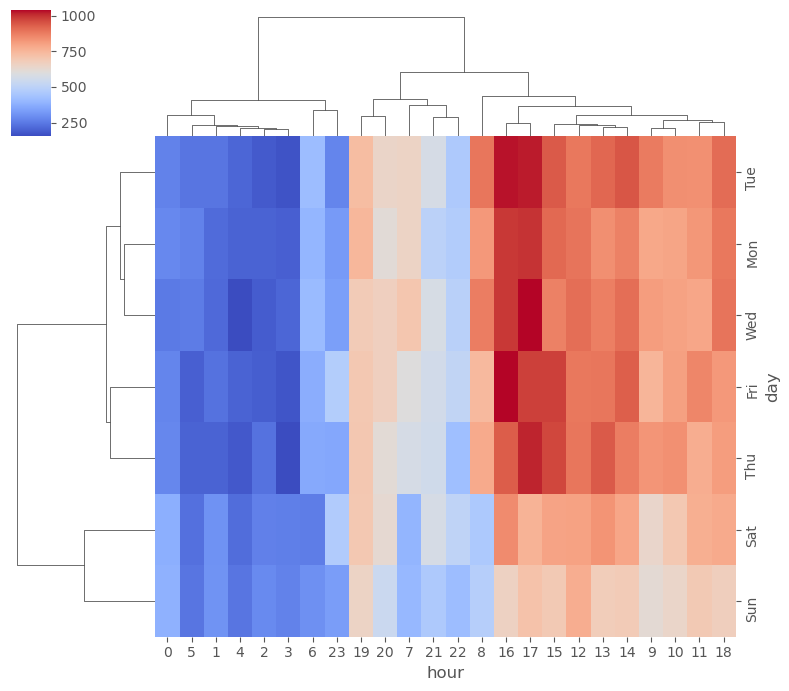

In [133]:
sns.clustermap(df_unstacked, cmap='coolwarm', figsize=(8, 7));

In [ ]:
# Clarifies what the heatmap shows by clustering similar hours and days

**Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [125]:
df_grouped = df.groupby(by=['day', 'month'])['e'].count().unstack()

In [126]:
df_grouped.head()

month,1,2,3,4,5,6,7,8,12
day,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


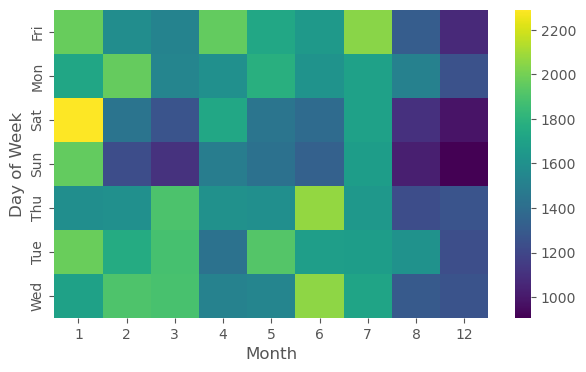

In [127]:
plt.figure(figsize=(7, 4))

sns.heatmap(df_grouped, cbar=True, cmap='viridis')
plt.xlabel('Month')
plt.ylabel('Day of Week');

In [ ]:
# Fairly well distributed number of 911 calls made during the week
# Fairly well distributed number of 911 calls until August when the numbers drop
# January has high number of 911 calls, especially on Saturday interestingly enough

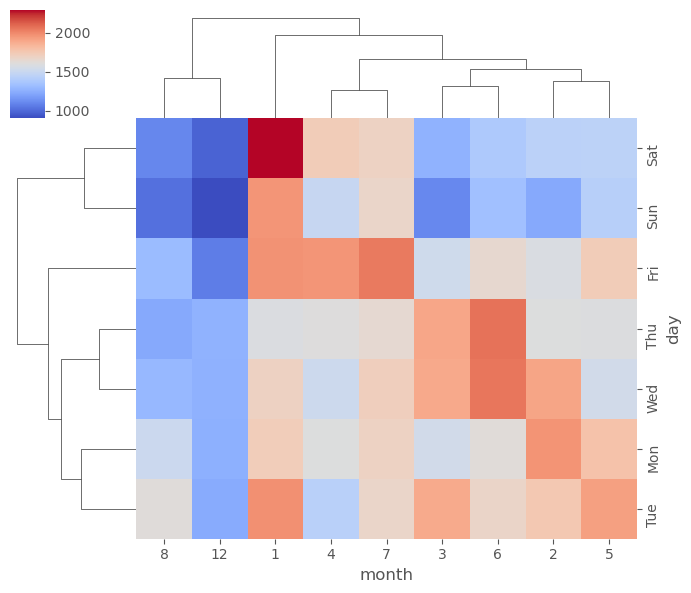

In [131]:
sns.clustermap(df_grouped, cmap='coolwarm', figsize=(7, 6));

In [ ]:
# Clarifies what the heatmap shows by clustering similar months and days

**Continue exploring the Data however you see fit!**
# Great Job!